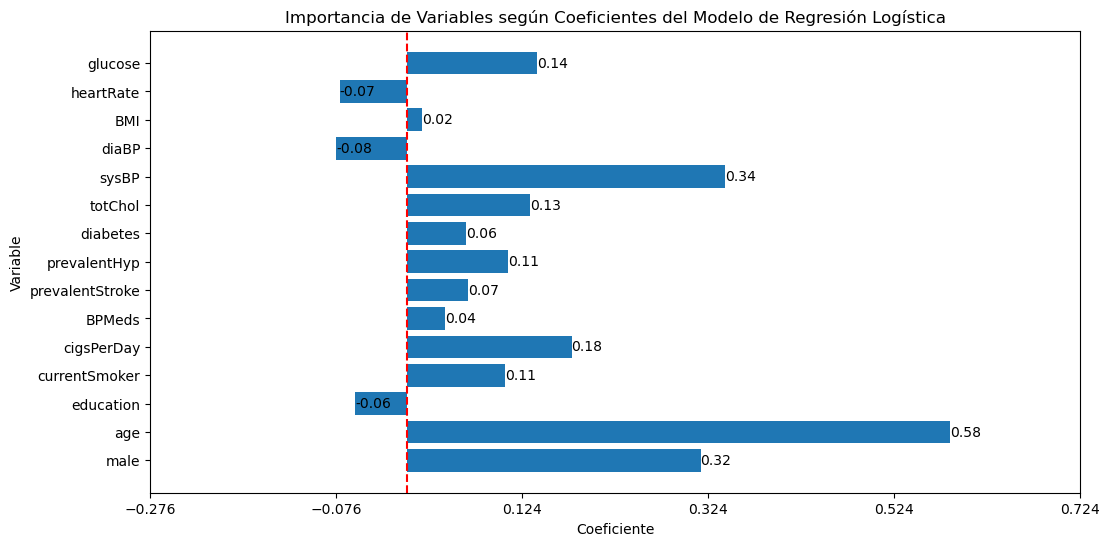

La precisión del modelo es: 0.8360655737704918
Matriz de Confusión: 
[[602   8]
 [112  10]]


In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el dataset
df = pd.read_csv('C:/anaconda_data/framingham.csv')  # Asegúrese de tener el archivo 'framingham.csv' en la misma carpeta

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Separar variables independientes y variable dependiente
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener los coeficientes del modelo
coefficients = logistic_model.coef_[0]

# Crear una gráfica de barras para los coeficientes
plt.figure(figsize=(12, 6))
plt.barh(X.columns, coefficients)
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Importancia de Variables según Coeficientes del Modelo de Regresión Logística')
plt.axvline(x=0, color='r', linestyle='--')
plt.xticks(np.arange(min(coefficients) - 0.2, max(coefficients) + 0.2, 0.2))

# Anotar valores en la gráfica
for i, coef in enumerate(coefficients):
    plt.text(coef, i, round(coef, 2), va='center')

plt.show()

# Imprimir precisión y matriz de confusión
print(f"La precisión del modelo es: {accuracy}")
print(f"Matriz de Confusión: \n{conf_matrix}")
